### 1. Loading and viewing the data

In this section, we will load the data and view it with some of its summary statistics, to get a basic understanding of what is in the data. We have also researched the exact meaning of the features within the dataset:
- Team: Name of the team the data was collected on
- League: League that that team played in that year
- Year: Year the data was collected for that team
- Runs Scored (RS): The number of runs scored by the team in that year
- Runs Allowed (RA): The number of runs that the team allowed other teams to score that year.
- Wins (W): The number of wins that team had that year
- On-Base Percentage (OBP): Measures the pectentage of times a batter reaches base safely during their plate appearance. The higher the on-base percentage, the more opportunities the team has to score runs.
- Slugging Percentage (SLG): Measure of the batter productivity of a hitter. It is the total number of bases a player records per at-bat. In this case, its recorded for the entire team.
- Batting Average (BA): Measures a hitter's success at the plate. A player's hits divides by his total at-bats. In this case, its recorded for the entire team.
- Playoffs (binary): If the team made the playoffs that year
- RankSeason: The rank of the team in that season that year
- RankPlayoffs: The rank of the team in the playoffs that year
- Games Played (G): The number of games played by the team that year
- Opponent On-Base Percentage (OOBP): The on-base percentage of the opponents of the team that year. High values for this feature may indiciate that the team lacks proper defending abilities.
- Opponent Slugging Percentage (OSLG): The slugging percentage of the opponents of the team that year. High values for this feature may indiciate that the team lacks proper defending abilities.


In [1]:
import pandas as pd 

moneyball = pd.read_csv("baseball.csv")
moneyball.head()

Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG  
0           NaN  162  0.317  0.415  
1           5.0  162  0.306  0.378  
2           4.0  162  0.315  0.403  
3           NaN  162  0.331  0.428  
4           NaN  162  0.335  0.424

Because many of the feature names are abbreviations, the dataframe is hard to understand. Therefore, we change the feature names to the entire definition.

In [2]:
# Renaming columns

moneyball.rename(columns={'RS':'Runs_scored',
                     'RA':'Runs_allowed',
                     'W': 'Wins',
                     'OBP': 'On_base_percentage',
                     'SLG': 'Slugging_percentage',
                     'BA':'Batting_average',
                     'G': 'Games_played',
                     'OOBP':'Opponent_on_base_percentage',
                     'OSLG':'Opponent_slugging_percentage',
                    }, inplace=True)

moneyball.head()

Team League  Year  Runs_scored  Runs_allowed  Wins  On_base_percentage  \
0  ARI     NL  2012          734           688    81               0.328   
1  ATL     NL  2012          700           600    94               0.320   
2  BAL     AL  2012          712           705    93               0.311   
3  BOS     AL  2012          734           806    69               0.315   
4  CHC     NL  2012          613           759    61               0.302   

   Slugging_percentage  Batting_average  Playoffs  RankSeason  RankPlayoffs  \
0                0.418            0.259         0         NaN           NaN   
1                0.389            0.247         1         4.0           5.0   
2                0.417            0.247         1         5.0           4.0   
3                0.415            0.260         0         NaN           NaN   
4                0.378            0.240         0         NaN           NaN   

   Games_played  Opponent_on_base_percentage  Opponent_slugging_percentage  
0           162                        0.317                         0.415  
1           162                        0.306                         0.378  
2           162                        0.315                         0.403  
3           162                        0.331                         0.428  
4           162                        0.335                         0.424

Next, we look at the number of NULL values in the dataset. We observe a high number of NULL values for RankSeason, RankPlayoffs, Opponent_on_base_percentage and Opponent_slugging_percentage.

In [3]:
moneyball.isnull().sum()

Team                              0
League                            0
Year                              0
Runs_scored                       0
Runs_allowed                      0
Wins                              0
On_base_percentage                0
Slugging_percentage               0
Batting_average                   0
Playoffs                          0
RankSeason                      988
RankPlayoffs                    988
Games_played                      0
Opponent_on_base_percentage     812
Opponent_slugging_percentage    812
dtype: int64

Next, we observe the data type of the features in the dataset.

In [4]:
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team                          1232 non-null   object 
 1   League                        1232 non-null   object 
 2   Year                          1232 non-null   int64  
 3   Runs_scored                   1232 non-null   int64  
 4   Runs_allowed                  1232 non-null   int64  
 5   Wins                          1232 non-null   int64  
 6   On_base_percentage            1232 non-null   float64
 7   Slugging_percentage           1232 non-null   float64
 8   Batting_average               1232 non-null   float64
 9   Playoffs                      1232 non-null   int64  
 10  RankSeason                    244 non-null    float64
 11  RankPlayoffs                  244 non-null    float64
 12  Games_played                  1232 non-null   int64  
 13  Opp

We are interested in what factors improving the amount of wins of a team. To get a better idea on how many wins a team had, relative to the number of games played, we introduce a new feature called 'Win_percentage':

$ Win\_percentage = \frac{Wins}{Games\_played}$ 

In [5]:
moneyball['Win_percentage'] = moneyball['Wins'] / moneyball['Games_played']

Next, we split numerical and categorical columns to print more detailed information. We set 'Year' as a categorical value so that we can see on which years we have information.

In [6]:
moneyball['Year'] = moneyball['Year'].astype('object')
non_numeric_moneyball = moneyball.select_dtypes(exclude=['number'])
numeric_moneyball = moneyball.select_dtypes(include=['number'])

In [7]:
for var in non_numeric_moneyball.columns:
    print(var)
    print(moneyball[var].unique())
    print(f'Number of unique values: {len(moneyball[var].unique())}')
    print('\n')

Team
['ARI' 'ATL' 'BAL' 'BOS' 'CHC' 'CHW' 'CIN' 'CLE' 'COL' 'DET' 'HOU' 'KCR'
 'LAA' 'LAD' 'MIA' 'MIL' 'MIN' 'NYM' 'NYY' 'OAK' 'PHI' 'PIT' 'SDP' 'SEA'
 'SFG' 'STL' 'TBR' 'TEX' 'TOR' 'WSN' 'FLA' 'TBD' 'ANA' 'MON' 'CAL' 'WSA'
 'SEP' 'KCA' 'MLN']
Number of unique values: 39


League
['NL' 'AL']
Number of unique values: 2


Year
[2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999
 1998 1997 1996 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983
 1982 1980 1979 1978 1977 1976 1975 1974 1973 1971 1970 1969 1968 1967
 1966 1965 1964 1963 1962]
Number of unique values: 47




In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
numeric_moneyball.describe()

Runs_scored  Runs_allowed    Wins  On_base_percentage  \
count      1232.00       1232.00 1232.00             1232.00   
mean        715.08        715.08   80.90                0.33   
std          91.53         93.08   11.46                0.02   
min         463.00        472.00   40.00                0.28   
25%         652.00        649.75   73.00                0.32   
50%         711.00        709.00   81.00                0.33   
75%         775.00        774.25   89.00                0.34   
max        1009.00       1103.00  116.00                0.37   

       Slugging_percentage  Batting_average  Playoffs  RankSeason  \
count              1232.00          1232.00   1232.00      244.00   
mean                  0.40             0.26      0.20        3.12   
std                   0.03             0.01      0.40        1.74   
min                   0.30             0.21      0.00        1.00   
25%                   0.38             0.25      0.00        2.00   
50%                   0.40             0.26      0.00        3.00   
75%                   0.42             0.27      0.00        4.00   
max                   0.49             0.29      1.00        8.00   

       RankPlayoffs  Games_played  Opponent_on_base_percentage  \
count        244.00       1232.00                       420.00   
mean           2.72        161.92                         0.33   
std            1.10          0.62                         0.02   
min            1.00        158.00                         0.29   
25%            2.00        162.00                         0.32   
50%            3.00        162.00                         0.33   
75%            4.00        162.00                         0.34   
max            5.00        165.00                         0.38   

       Opponent_slugging_percentage  Win_percentage  
count                        420.00         1232.00  
mean                           0.42            0.50  
std                            0.03            0.07  
min                            0.35            0.25  
25%                            0.40            0.45  
50%                            0.42            0.50  
75%                            0.44            0.55  
max                            0.50            0.72

### 2. EDA

In this section, we perform exploratory data analysis by looking at the correlation matrix and making several types of plots.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

First, we look at the correlation matrix for the numeric variables in the dataset.

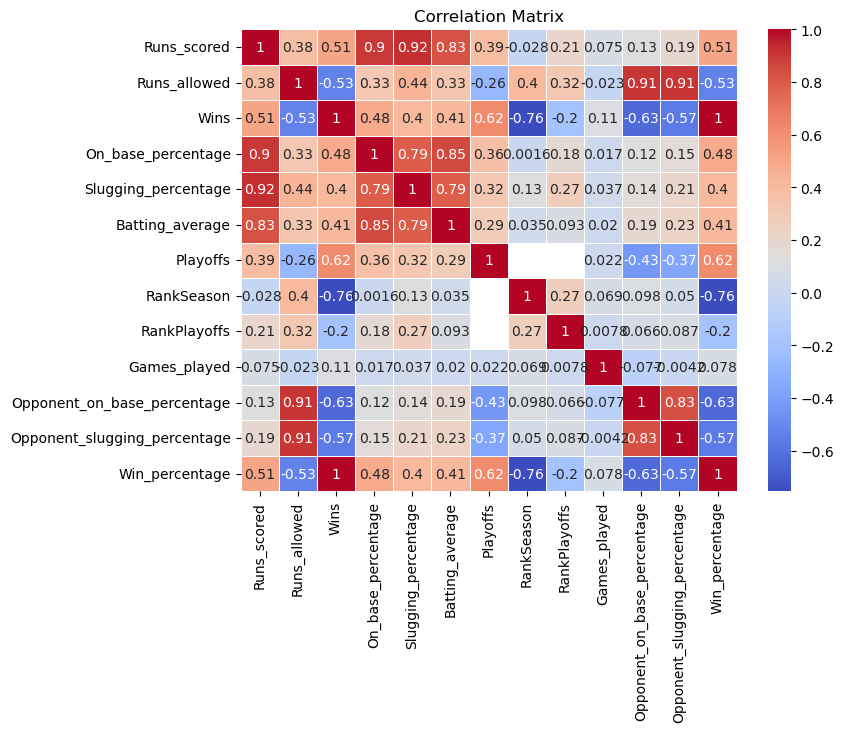

In [10]:
# Creating correlation matrix
corr_matrix = numeric_moneyball.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Some of the numeric features are continuous, and some of the numeric features are count variables (integers). Because this is not always accurately reflected in the data type of the features, we manually decide which features are continuous (cont_moneyball) and which are count variables (n_moneyball). After deciding this, we create histograms for the continuous features to get an idea of their distributions. Moreover, we create bar plots to observe the different values for the count variables.

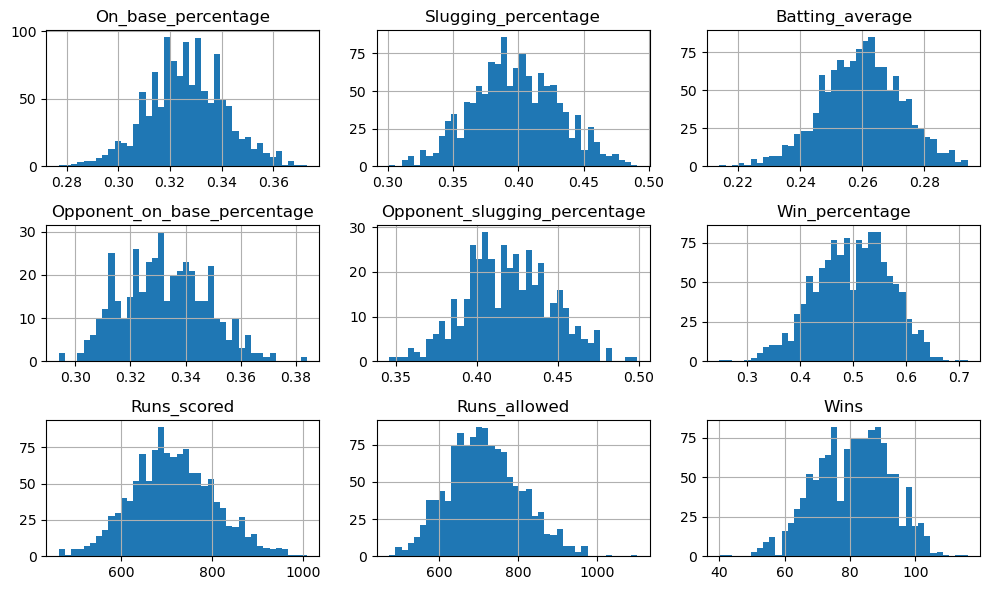

In [14]:
# Creating several histograms
cont_moneyball = numeric_moneyball.select_dtypes(include=['float'])
cont_moneyball.drop(labels=['RankSeason','RankPlayoffs'], inplace=True, axis=1)
cont_moneyball = pd.concat([cont_moneyball,numeric_moneyball[['Runs_scored','Runs_allowed','Wins']]],axis=1)
cont_moneyball.hist(figsize=(10, 6), bins=40)
plt.tight_layout()
plt.show()

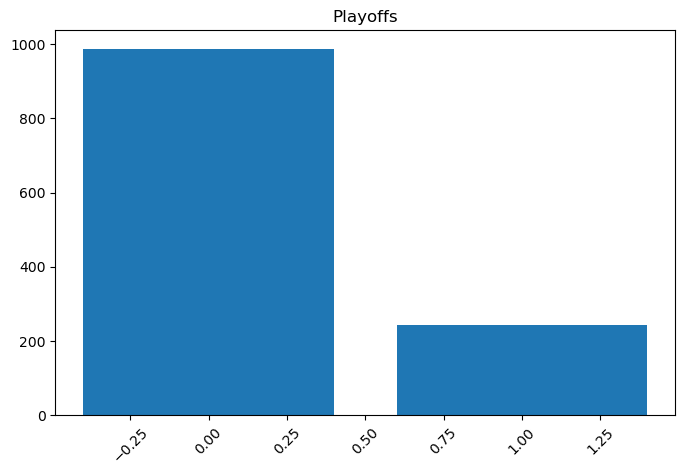

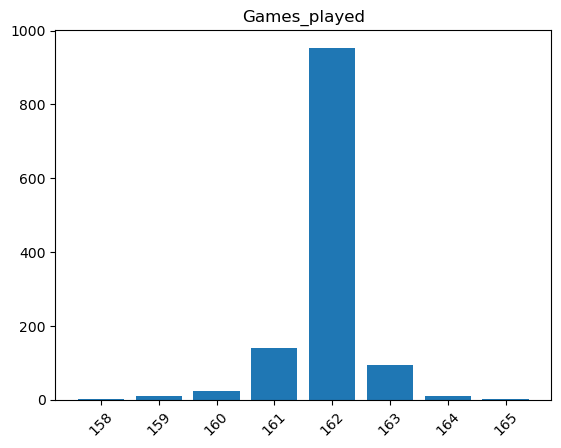

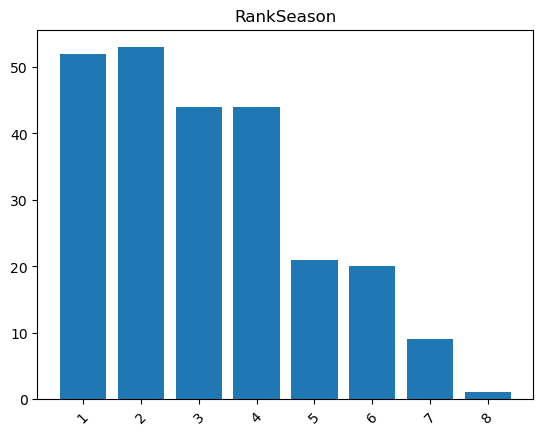

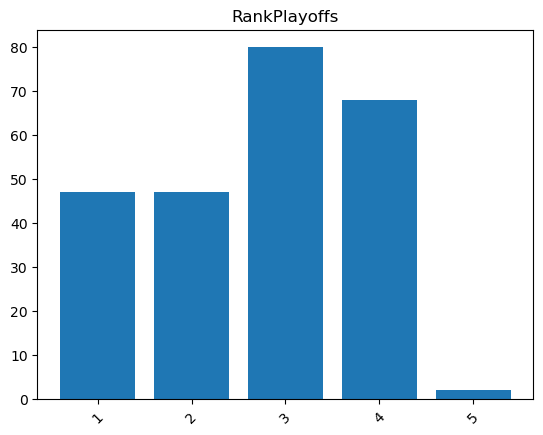

In [15]:
n_moneyball = numeric_moneyball.select_dtypes(include=['int'])
n_moneyball.drop(labels=['Runs_scored','Runs_allowed','Wins'], inplace=True, axis=1)
n_moneyball = pd.concat([n_moneyball,numeric_moneyball[['RankSeason','RankPlayoffs']]],axis=1)

# Set the figure size
plt.figure(figsize=(8, 5))
# Count occurrences of each unique value in 'Team'
for col in n_moneyball.columns:
    counts = n_moneyball[col].value_counts()
    # Create the bar plot
    plt.bar(counts.index, counts.values)
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

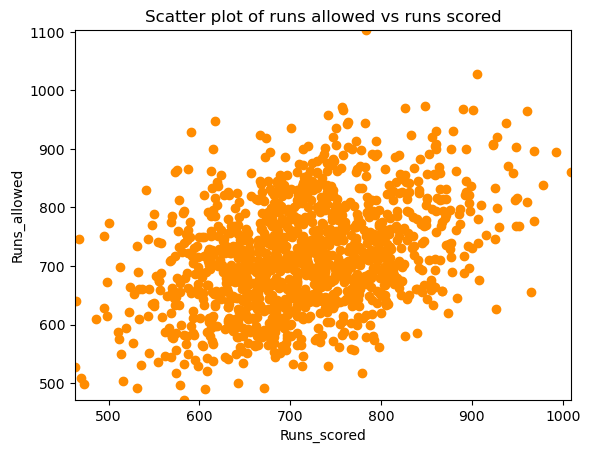

In [16]:
plt.scatter(moneyball['Runs_scored'],moneyball['Runs_allowed'],c='darkorange')
plt.xlim([min(moneyball['Runs_scored']),max(moneyball['Runs_scored'])])
plt.ylim([min(moneyball['Runs_allowed']),max(moneyball['Runs_allowed'])])
plt.xlabel('Runs_scored')
plt.ylabel('Runs_allowed')
plt.title('Scatter plot of runs allowed vs runs scored')
plt.show()

### 3. Data cleaning

In this section, we perform data cleaning. Let us recall how many NULL values we have in the dataset.

In [18]:
moneyball.isnull().sum()

Team                              0
League                            0
Year                              0
Runs_scored                       0
Runs_allowed                      0
Wins                              0
On_base_percentage                0
Slugging_percentage               0
Batting_average                   0
Playoffs                          0
RankSeason                      988
RankPlayoffs                    988
Games_played                      0
Opponent_on_base_percentage     812
Opponent_slugging_percentage    812
Win_percentage                    0
dtype: int64

Because we are looking to predict the Win_percentage of a team, we drop the variables 'Playoffs', 'Wins' and 'Games_played'.

Moreover, because 'RankSeason' and 'RankPlayoffs' contain many missing values, we also drop these features.
We drop the feature 'Team' because the team name is not relevant for our analysis.

Lastly, we also drop the features Runs_scored and Runs_allowed because they are too directly indicative of the number of wins, and therefore they are not useful to include in our analysis. This direct effect is visualised in the slides that come with this assignment.


In [19]:
cols_to_drop = ['Playoffs','RankSeason','RankPlayoffs','Games_played','Wins','Team','Runs_scored','Runs_allowed']
moneyball.drop(labels=cols_to_drop,inplace=True,axis=1)
moneyball.head()

League  Year  On_base_percentage  Slugging_percentage  Batting_average  \
0     NL  2012                0.33                 0.42             0.26   
1     NL  2012                0.32                 0.39             0.25   
2     AL  2012                0.31                 0.42             0.25   
3     AL  2012                0.32                 0.41             0.26   
4     NL  2012                0.30                 0.38             0.24   

   Opponent_on_base_percentage  Opponent_slugging_percentage  Win_percentage  
0                         0.32                          0.41            0.50  
1                         0.31                          0.38            0.58  
2                         0.32                          0.40            0.57  
3                         0.33                          0.43            0.43  
4                         0.34                          0.42            0.38

The data on the opponents, Opponent_on_base_percentage and Opponent_slugging_percentage, also contains many missing values. One of the consideration would be to drop the years for which we have missing data on the opponents. However, as can be seen below, this would mean that we have to drop a large percentage of the dataset. Imputation is not an option either, because the amoount of missing values is much bigger than the amount of values that are known.

In [20]:
opponent_features = ['Opponent_on_base_percentage','Opponent_slugging_percentage']
print('Number of NULL values for opponents:')
print(moneyball[opponent_features].isnull().sum())

print('\n')
print('Years that contain NULL values for the opponent data:')
null_opponents = moneyball[moneyball['Opponent_on_base_percentage'].isnull()]
years_with_null_opponents = null_opponents['Year'].unique()
print(years_with_null_opponents)

n_null = moneyball[opponent_features].isnull().sum().iloc[0]
n_total = moneyball.shape[0]
print('\n')
print(f'Dropping instances with NULL values would reduce the number of instances with {-(n_null-n_total)/n_total*100:2f}%')

Number of NULL values for opponents:
Opponent_on_base_percentage     812
Opponent_slugging_percentage    812
dtype: int64


Years that contain NULL values for the opponent data:
[1998 1997 1996 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983
 1982 1980 1979 1978 1977 1976 1975 1974 1973 1971 1970 1969 1968 1967
 1966 1965 1964 1963 1962]


Dropping instance with NULL values would reduce the number of instances with 34.090909%


Because we believe that the opponent features may be important for the analysis, we propose two courses of action:
1. Drop the opponent features so that we can use a larger number of instances for the analysis.
2. Keep the opponent features and drop the instances that contain NULL values for the opponent features. This will decrease the number of instances that can be used for model training, but does allow for the inclusion of the possibly important features.

By setting the variable 'use_opponent_data' to True, the opponent features will not be dropped, but instead the instances with NULL values will be dropped. Contrarily, if the variable 'use_opponent_data' is set to False, the features are dropped and the analysis is done using the remaining features and all instances. To see the different results of these two analyses, please manually change the variable 'use_opponent_data' to either True or False.

In [21]:
use_opponent_data = False

if use_opponent_data == True:
    moneyball.dropna(inplace=True)
else:
    moneyball.drop(labels=['Opponent_on_base_percentage','Opponent_slugging_percentage'],axis=1,inplace=True)

### 4. Feature engineering & encoding

In this category, we perform feature engineering and encoding. First, we manually encode the feature 'League' to be binary, where a value of 0 indicates 'AL' (American League) and the value 1 indicates 'NL' (National League).

In [22]:
# Only two categories, say NL = 1 and AL = 0 
moneyball.loc[moneyball['League'] == 'AL',"League"] = 0
moneyball.loc[moneyball['League'] == 'NL',"League"] = 1

Secondly, we decided to include the year information as decade information. The purpose of this is to reduce the number of variables that would be added to the dataset if the 'Year' variable were to be encoded. Using decade information, it is only necessary to include a dummy variable for 6 decades, instead of a dummy variable for each year, which would require adding 39 dummy variables.

In [23]:
moneyball['decade60s'] = moneyball['Year'].apply(lambda x: 1 if 1960 <= x < 1970 else 0)
moneyball['decade70s'] = moneyball['Year'].apply(lambda x: 1 if 1970 <= x < 1980 else 0)
moneyball['decade80s'] = moneyball['Year'].apply(lambda x: 1 if 1980 <= x < 1990 else 0)
moneyball['decade90s'] = moneyball['Year'].apply(lambda x: 1 if 1990 <= x < 2000 else 0)
moneyball['decade2000s'] = moneyball['Year'].apply(lambda x: 1 if 2000 <= x < 2010 else 0)
moneyball['decade2010s'] = moneyball['Year'].apply(lambda x: 1 if 2010 <= x < 2020 else 0)
moneyball.drop(labels=['Year'],axis=1,inplace=True)

### 5. Feature scaling and selection

In this section, we perform feature scaling and feature selection. First, we split the data into a training set and a test set:

In [24]:
from sklearn.model_selection import train_test_split
X = moneyball.drop(labels=['Win_percentage'],axis=1)
y = moneyball['Win_percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train: {}, X_test: {} \ny_train: {}   , y_test: {}\n".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (924, 10), X_test: (308, 10) 
y_train: (924,)   , y_test: (308,)



We use the MinMaxScaler because many of the included features are percentages, meaning they range between 0 and 1. The MinMaxScaler ensures they remain within this range, which ensures intrepretability.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

To improve our analysis, we will use several features as control variables in our models. In our model we added two control variables: the 'decade' features and 'League'.  

Decade features: the dataset has data from 1962 – 2020, which we split into decades. Over the decades the rules in Major League Baseball (MLB) have changed, of which the most important one was ‘the designated hitter’ in 1973. (source: https://www.espn.com/mlb/columns/schwarz_alan/1503763.html) This can have an effect on performance and therefore team wins. By adding ‘decade’ as control variable we account for rule changes. 

League: the MLB is split into two leagues, the American League (AL) and National League (NL). These two leagues had different rules in the past, again the most important difference is the rule for a ‘designated hitter’ (source: https://en.wikipedia.org/wiki/Major_League_Baseball#:~:text=The%20same%20rules%20and%20regulations,rule%20for%20the%20first%20time). By adding league as a control variable we can control for this difference in team performance.

Below, we split these control variables from the dataset so that we can perform a feature selection method for the other features.

In [26]:
control_vars = ['League','decade60s','decade70s','decade80s','decade90s','decade2000s','decade2010s']
X_train_control = X_train[control_vars]
X_train.drop(labels=control_vars,axis=1,inplace=True)
X_test_control = X_test[control_vars]
X_test.drop(labels=control_vars,axis=1,inplace=True)

Next to the control variables we want to include, we perform a feature selection method to decide which other features would be relevant for our analysis. Because we have a relatively small data set, we chose to perform forward feature selection using a linear regression at each step. This is done below. As we want to keep at least two features in our dataset, we select a tolerance level that is sufficiently small. Below, we can see that the feature 'Batting_average' is removed from the dataset, for both the analysis with the opponent data and for the analysis without the opponent data.

In [27]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select="auto",tol=0.00001)
sfs.fit(X_train, y_train)
feature_names = sfs.feature_names_in_
print('The following features are selected:')
print(feature_names[sfs.get_support()])

The following features are selected:
['On_base_percentage' 'Slugging_percentage']


The control variables are again added into the training and the testing set.

In [28]:
X_train = X_train[feature_names[sfs.get_support()]]
X_test = X_test[feature_names[sfs.get_support()]]
X_train = pd.concat([X_train, X_train_control],axis=1)
X_test = pd.concat([X_test, X_test_control],axis=1)

### 6. Modelling

In this section, we will train two models on the training data and use cross-validation to determine the models' performances. The two selected models are the KNN regressor and the Bayesian Ridge regressor.

##### 6.1. KNN regressor

KNN as a model suffers significantly from the curse of dimensionality and is sensitive to missing data. We have a low-dimensional dataset without missing data. As such, we’re avoiding most drawbacks of the KNN approach while enjoying all of the benefits. Speaking of, KNN is a good model of choice here as it is time-efficient and simple to tune, which allows us to perform grid search to optimize the parameters of the KNN model. (Taunk et al., 2019)

For each prediction, the time complexity of the the K-Nearest Neighbors algorithm is O(MNlog(k)), where M is the dimension of the data and N is the size or number of instances in the training data set. In our case, we’re looking at 1232 entries, 

Source: https://zilliz.com/blog/k-nearest-neighbor-algorithm-for-machine-learning 


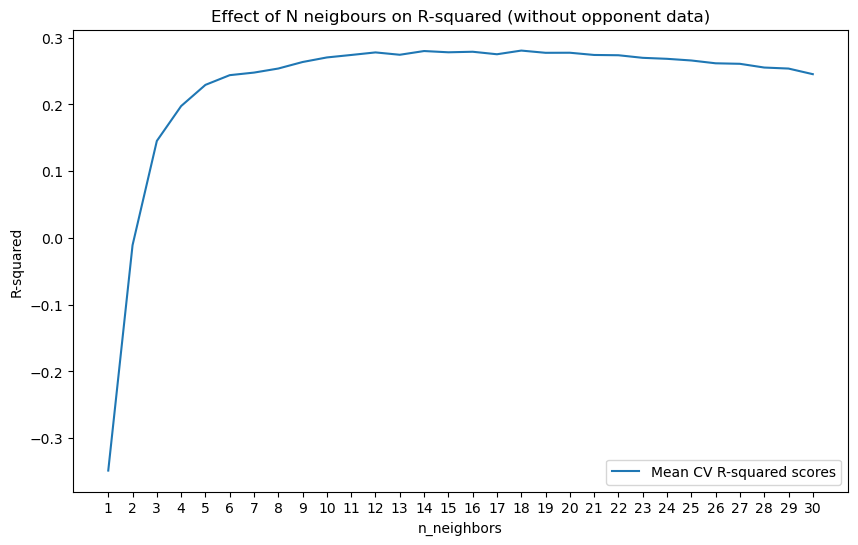

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Model
training_r2 = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    # Build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    # Use cross validation to obtain R-squared scores for training set
    cv_scores = cross_val_score(reg, X_train, y_train, cv=10)
    mean_score = cv_scores.mean()
    training_r2.append(mean_score)

plt.figure(figsize=(10,6))
if use_opponent_data == True:
    plt.title('Effect of N neigbours on R-squared (with opponent data)')
else:
    plt.title('Effect of N neigbours on R-squared (without opponent data)')
plt.plot(neighbors_settings, training_r2, label="Mean CV R-squared scores")
plt.xticks(neighbors_settings)
plt.ylabel("R-squared")
plt.xlabel("n_neighbors")
plt.legend()

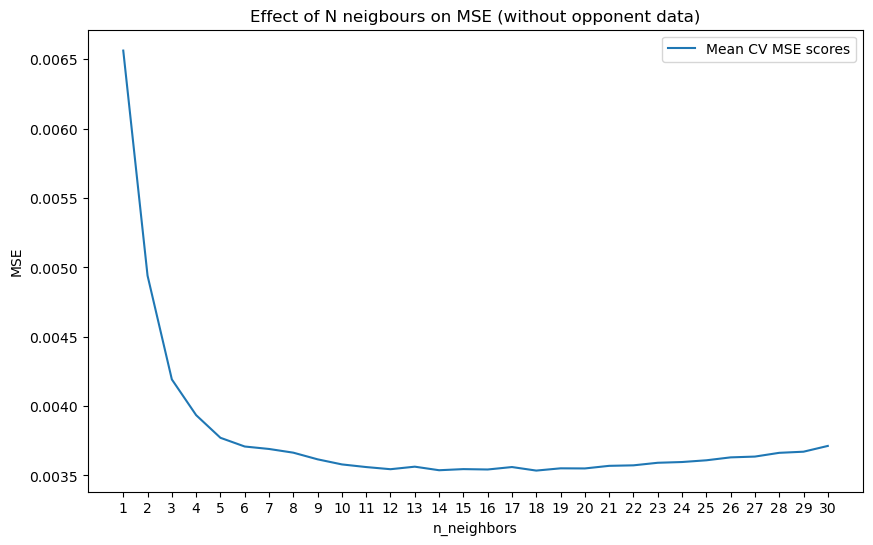

In [30]:
# Model
training_mse = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    # Build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    # Use cross validation to obtain R-squared scores for training set
    cv_scores = cross_val_score(reg, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    mean_score = -cv_scores.mean()
    training_mse.append(mean_score)

plt.figure(figsize=(10,6))
if use_opponent_data == True:
    plt.title('Effect of N neigbours on MSE (with opponent data)')
else:
    plt.title('Effect of N neigbours on MSE (without opponent data)')
plt.plot(neighbors_settings, training_mse, label="Mean CV MSE scores")
plt.xticks(neighbors_settings)
plt.ylabel("MSE")
plt.xlabel("n_neighbors")
plt.legend()

Let us consider the two cases we discussed.

1. **Including the opponent data:** From the plots above we can see that 4 neighbours in the optimal number of neighbours in terms of the R-squared. For the MSE, 4 neighbours lead to a slightly higher error than 3 neighbours, but this effect is so small that is is diminishable. Hence, we continue with 4 neighbours for this analysis.
2. **Without the opponent data**: From the plots above we can see 6 neighbours is around the optimal number of neighbours, using the elbow method to determine this. This is both in terms of the MSE and R-squared. Hence, we continue with 6 neighbours for this analysis. 

Mean Squared Error over test set: 0.004
R² over test: 0.218
Cross-validation R²: [0.196713   0.14428019 0.2043668  0.38126167 0.42098534 0.24235704
 0.17420608 0.24072441 0.14323658 0.28887373]

Mean R² over 10 folds: 0.244


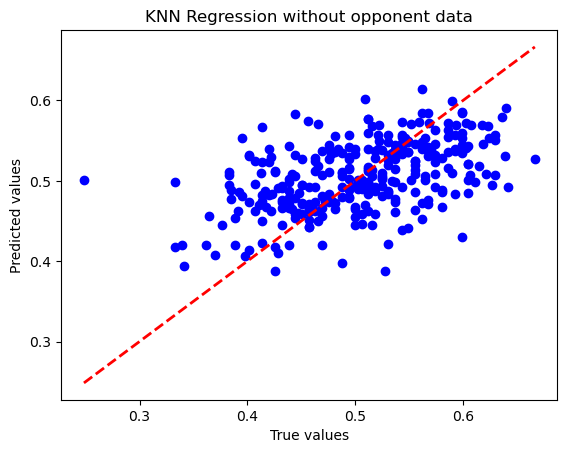

In [31]:
from sklearn.metrics import mean_squared_error

if use_opponent_data == True:
    KNN_regressor = KNeighborsRegressor(n_neighbors=4)
else:
    KNN_regressor = KNeighborsRegressor(n_neighbors=6)
KNN_regressor.fit(X_train, y_train)
y_pred = KNN_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\033[1mMean Squared Error\033[0m over test set: \033[1m{mse:.3f}\033[0m")

r2_score = KNN_regressor.score(X_test, y_test)
print(f"\033[1mR²\033[0m over test: \033[1m{r2_score:.3f}\033[0m")

# k-fold cross-validation
cv_scores = cross_val_score(KNN_regressor, X_train, y_train, cv=10)
print(f"\033[1mCross-validation R²\033[0m: {cv_scores}")
print(f"\n\033[1mMean R²\033[0m over 10 folds: \033[1m{cv_scores.mean():.3f}\033[0m")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predicted values')
if use_opponent_data == True:
    plt.title('KNN Regression with opponent data')
else:
    plt.title('KNN Regression without opponent data')
plt.show()

##### 6.2. Bayesian Ridge regressor

Bayesian networks excel in handling uncertainty, making them particularly suitable for this dataset, which spans several decades. Relationships between variables, such as player stats and team performance, may change over time due to factors like rule changes, player strategies, and economic conditions none of which are captured directly in the dataset. Bayesian regression can also perform well when data is limited. Although the dataset covers a long period, it becomes relatively small when split into training and test sets, highlighting the need for methods that can work effectively with limited data. 

Next to that, Bayesian regression is valuable for identifying causal relationships. In this case, variables such as on-base percentage, slugging percentage, and batting performance have a direct causal effect on the outcome of wins, as these metrics influence the number of runs scored, which determines whether a team wins or loses.

Sources: 
- https://math.montana.edu/grad_students/writing-projects/2012/12thornton.pdf
- Lecture 5 on Bayesian network 


Mean Squared Error over test: 0.003
R² over test set: 0.326
Cross-validation R²: [0.20536606 0.23336766 0.31418978 0.43601553 0.42862958 0.3329481
 0.18958261 0.22848477 0.2473921  0.36893838]

Mean R² over 10 folds: 0.298


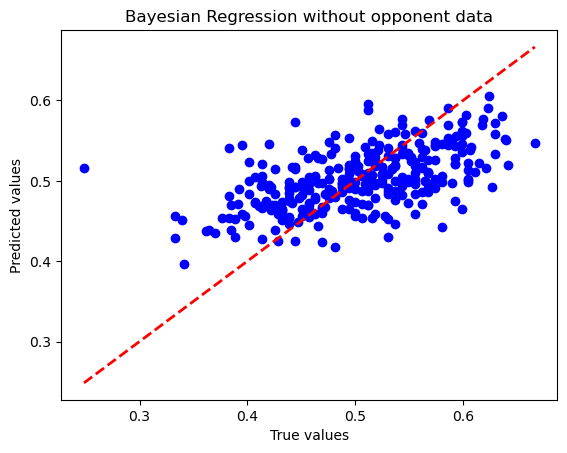

In [32]:
from sklearn.linear_model import BayesianRidge

bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)
y_pred = bayesian_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\033[1mMean Squared Error\033[0m over test: \033[1m{mse:.3f}\033[0m")

r2_score = bayesian_regressor.score(X_test, y_test)
print(f"\033[1mR²\033[0m over test set: \033[1m{r2_score:.3f}\033[0m")

# k-fold cross-validation
cv_scores = cross_val_score(bayesian_regressor, X_train, y_train, cv=10)
print(f"\033[1mCross-validation R²\033[0m: {cv_scores}")
print(f"\n\033[1mMean R²\033[0m over 10 folds: \033[1m{cv_scores.mean():.3f}\033[0m")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predicted values')
if use_opponent_data == True:
    plt.title('Bayesian Regression with opponent data')
else:
    plt.title('Bayesian Regression without opponent data')
plt.show()

### 7. Extra Modelling
##### In this section, the option to predict the chance of winning between two teams is estimated.

This is done by training a Linear Regression model with the Winning Percentage as the target feature and the SLG, OBS, OSLG and OOBS are used as the predictor features. 

After training, new input entries are based on the average SLG and OBS of every team since 2000 (which ofcourse can be altered). The first teams statistics are used as SLG/OBS, the second as OSLG/OOBS in the model.

###### It must be noted that these are experiments, working on this in more detail would be a good next step for our future work.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Importing Data Again
moneyball_future_work = pd.read_csv("baseball.csv")
moneyball_future_work.head()

Team League  Year   RS   RA   W  OBP  SLG   BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81 0.33 0.42 0.26         0         NaN   
1  ATL     NL  2012  700  600  94 0.32 0.39 0.25         1        4.00   
2  BAL     AL  2012  712  705  93 0.31 0.42 0.25         1        5.00   
3  BOS     AL  2012  734  806  69 0.32 0.41 0.26         0         NaN   
4  CHC     NL  2012  613  759  61 0.30 0.38 0.24         0         NaN   

   RankPlayoffs    G  OOBP  OSLG  
0           NaN  162  0.32  0.41  
1          5.00  162  0.31  0.38  
2          4.00  162  0.32  0.40  
3           NaN  162  0.33  0.43  
4           NaN  162  0.34  0.42

In [35]:
# Finding averages of Team Performances on OBP and SLG from 2000 until now.
team_stats = moneyball_future_work[moneyball_future_work['Year'] > 2000].groupby('Team').agg({'OBP': 'mean', 'SLG': 'mean'}).reset_index()
team_stats.sort_values(by=['OBP', 'SLG'], ascending=False)

Team  OBP  SLG
21  NYY 0.35 0.45
4   BOS 0.35 0.45
9   COL 0.34 0.43
28  STL 0.34 0.43
23  PHI 0.34 0.43
31  TEX 0.34 0.45
0   ANA 0.33 0.42
2   ATL 0.33 0.42
8   CLE 0.33 0.42
18  MIN 0.33 0.41
30  TBR 0.33 0.41
11  FLA 0.33 0.42
14  LAA 0.33 0.42
22  OAK 0.33 0.41
6   CHW 0.33 0.43
32  TOR 0.33 0.43
1   ARI 0.33 0.42
10  DET 0.33 0.42
7   CIN 0.33 0.42
15  LAD 0.33 0.40
17  MIL 0.33 0.42
27  SFG 0.33 0.41
20  NYM 0.33 0.40
5   CHC 0.33 0.42
12  HOU 0.33 0.41
3   BAL 0.33 0.41
25  SDP 0.32 0.39
33  WSN 0.32 0.40
13  KCR 0.32 0.40
26  SEA 0.32 0.40
19  MON 0.32 0.40
29  TBD 0.32 0.41
24  PIT 0.32 0.39
16  MIA 0.31 0.38

In [36]:
# Create the Target Feature Winning Ratio again
moneyball_future_work['WGR']=(moneyball_future_work['W']/moneyball_future_work['G'])
moneyball_future_work.dropna(inplace=True)

In [37]:
# Define Target Feature & Predictor Features
X = moneyball_future_work[['OBP', 'SLG', 'OOBP', 'OSLG']]
y = moneyball_future_work['WGR']

In [38]:
# Devide Test & Train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train: {}, X_test: {} \ny_train: {}   , y_test: {}\n".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (91, 4), X_test: (23, 4) 
y_train: (91,)   , y_test: (23,)



In [39]:
# Create Linear Regression Model | Good for non-normally distributed winning odds
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

Mean Squared Error: 0.0003356936193721927
R² Score: 0.16676823162781473


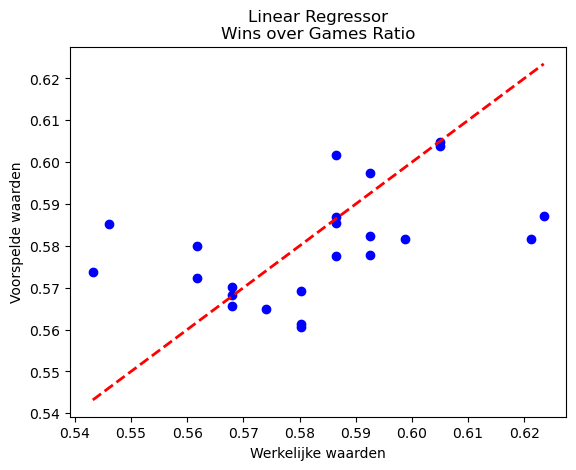

In [40]:
# View and Visualize model performance

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2_score = linear_regressor.score(X_test, y_test)
print(f"R² Score: {r2_score}")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Werkelijke waarden')
plt.ylabel('Voorspelde waarden')
plt.title('Linear Regressor\nWins over Games Ratio')
plt.show()

In [41]:
# Create Function to predict winning probability based on the trained Linear Regression model

def predict_win_probability(team1, team2):
    # Retrieve mean team stats
    team1_stats = team_stats[team_stats['Team'] == team1].iloc[0]
    team2_stats = team_stats[team_stats['Team'] == team2].iloc[0]
    
    # Use stats of teams combined as model input
    input_data = [[team1_stats['OBP'], team1_stats['SLG'], team2_stats['OBP'], team2_stats['SLG']]]

    # Predict via Linear Regression model
    win_probability = linear_regressor.predict(input_data)[0]  

    obp_diff = team1_stats['OBP'] - team2_stats['OBP']
    slg_diff = team1_stats['SLG'] - team2_stats['SLG']
    
    # Analyse what the relative weakest point of your opponent is
    if abs(obp_diff) > abs(slg_diff):
        weakness = f"OBP"
    else:
        weakness = f"SLG"
    
    return win_probability, weakness

In [42]:
# Show sorted stats of every team
team_stats.sort_values(by=['OBP', 'SLG'], ascending=False)

Team  OBP  SLG
21  NYY 0.35 0.45
4   BOS 0.35 0.45
9   COL 0.34 0.43
28  STL 0.34 0.43
23  PHI 0.34 0.43
31  TEX 0.34 0.45
0   ANA 0.33 0.42
2   ATL 0.33 0.42
8   CLE 0.33 0.42
18  MIN 0.33 0.41
30  TBR 0.33 0.41
11  FLA 0.33 0.42
14  LAA 0.33 0.42
22  OAK 0.33 0.41
6   CHW 0.33 0.43
32  TOR 0.33 0.43
1   ARI 0.33 0.42
10  DET 0.33 0.42
7   CIN 0.33 0.42
15  LAD 0.33 0.40
17  MIL 0.33 0.42
27  SFG 0.33 0.41
20  NYM 0.33 0.40
5   CHC 0.33 0.42
12  HOU 0.33 0.41
3   BAL 0.33 0.41
25  SDP 0.32 0.39
33  WSN 0.32 0.40
13  KCR 0.32 0.40
26  SEA 0.32 0.40
19  MON 0.32 0.40
29  TBD 0.32 0.41
24  PIT 0.32 0.39
16  MIA 0.31 0.38

In [43]:
# Interface of Predicting
## Choose two team abbreviation from the list above ##

team1 = input("What is your Team Name Abbreviation: ")
team2 = input("What is your Opponents Team Name Abbreviation: ")

predicted_win_probability, weakness = predict_win_probability(team1, team2)

print(f"The change of {team1} winning against {team2} is: {predicted_win_probability * 100:.2f}%\n")
print(f"The weakest point of your opponent {team2} is: \033[1m{weakness}\033[0m\n\n")

The change of WSN winning against MON is: 54.39%

The weakest point of your opponent MON is: SLG




c:\Users\anne\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
